MSE: 197.5649430042891
RMSE: 14.055779701044303
R2 Score: 0.07837800419924434


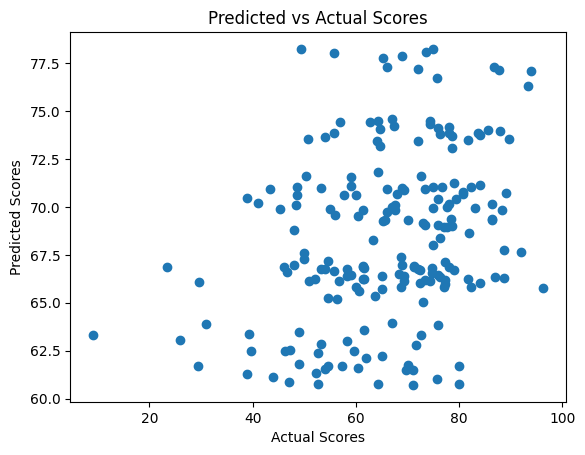

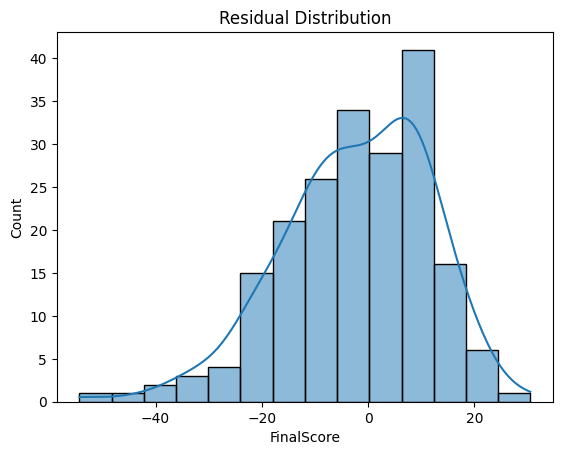

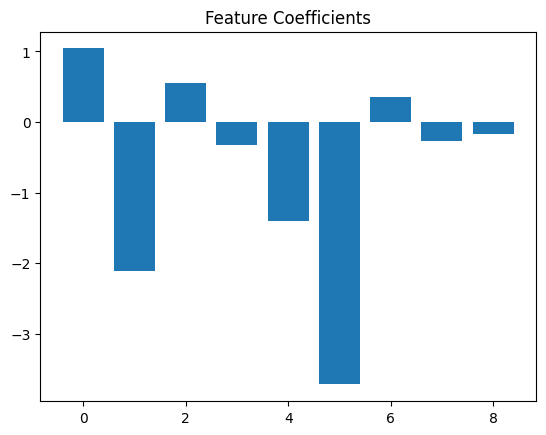

In [1]:
# EXPT NO:3 - Multilinear Regression
# Name: Ajay Krishnan
# Roll No: 24BAD006

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("/content/StudentsPerformance.csv")

# Create target variable
df["FinalScore"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3

# Select features
X = df[["parental level of education", "test preparation course"]]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Add numerical features
np.random.seed(42)
X["study_hours"] = np.random.randint(1, 6, size=len(X))
X["attendance"] = np.random.randint(60, 100, size=len(X))
X["sleep_hours"] = np.random.randint(4, 9, size=len(X))

y = df["FinalScore"]

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Ridge and Lasso
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predicted vs Actual plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Predicted vs Actual Scores")
plt.show()

# Residual distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# Coefficient plot
plt.bar(range(len(model.coef_)), model.coef_)
plt.title("Feature Coefficients")
plt.show()


Degree: 2
MSE: 13.760855128148345
RMSE: 3.709562659957147
R2: 0.7440623896917427
Degree: 3
MSE: 13.813374257350006
RMSE: 3.7166348027954004
R2: 0.7430855884466042
Degree: 4
MSE: 14.11802402282965
RMSE: 3.757395909779757
R2: 0.7374194192854786
Ridge R2 Score: 0.7447836290644597


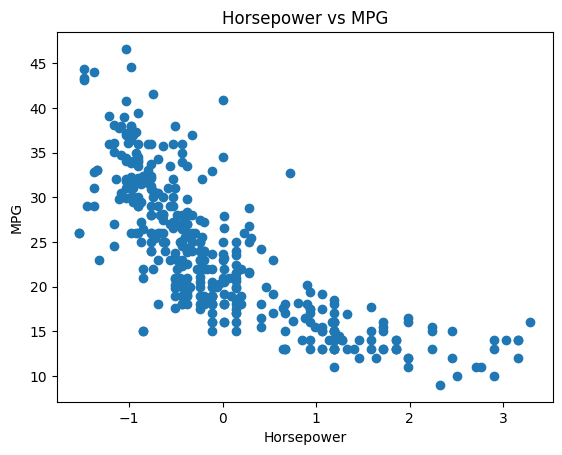

In [2]:
# EXPT NO:3 - Polynomial Regression
# Name: Ajay Krishnan
# Roll No: 24BAD006

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("/content/auto-mpg.csv")

# Clean horsepower column
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

# Handle missing values
imputer = SimpleImputer(strategy="mean")
df["horsepower"] = imputer.fit_transform(df[["horsepower"]])

# Select feature and target
X = df[["horsepower"]]
y = df["mpg"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train polynomial models
degrees = [2, 3, 4]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Degree:", d)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2:", r2)

# Ridge regularization (degree 4)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=10)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge))

# Scatter plot
plt.scatter(X_scaled, y)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Horsepower vs MPG")
plt.show()
